In [1]:
import knn
import loadcifar10 as lc
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
def cross_validate(root, l, k, results):
    accuracy = np.empty([5], dtype=np.float32)
    for i in range(1, 6):
        time_start = time.time()
        td, tl, vd, vl = lc.load_cifar_cross_validation(root, i)
        knn_o = knn.KNN()
        knn_o.train(td, tl)
        predictions = knn_o.predict(vd, k, l)
        num_correct = np.sum(predictions == vl)
        accuracy[i - 1] = num_correct / 10000
        print(time.time() - time_start)
    results[k] = accuracy

In [4]:
def plot_data(l, res):
    for k, v in sorted(res.items()):
        plt.scatter([k] * len(v), v)
    # Plot the trend line with error bars that correspond to standard deviation
    mean = np.array([np.mean(v) for k, v in sorted(res.items())])
    std = np.array([np.std(v) for k, v in sorted(res.items())])
    plt.errorbar([k for k, v in sorted(res.items())], mean, yerr=std)
    plt.title('Cross-validation on %s and k' % (l, ))
    plt.xlabel('k')
    plt.ylabel('Cross-validation accuracy')
    plt.show()

In [5]:
def test_cross_validate(l):
    ks = [1, 3, 5, 7, 9, 10, 13, 17, 20, 50, 75, 100]
    root = 'cifar-10-batches-py'
    results = dict()
    for k in ks:
        cross_validate(root, l, k, results)
    plot_data(l, results)

27.322786569595337
31.029844284057617
28.62177872657776
27.434898853302002
26.20403528213501
27.966044664382935
27.88405418395996
28.154189109802246
28.205742597579956
28.285200357437134
28.022700548171997
27.68132996559143
27.955408096313477
28.15657687187195
28.06997799873352
28.565490245819092
27.725121021270752
28.251500368118286
28.098077297210693
28.396265506744385
27.910519123077393
27.663290977478027
28.11322832107544
28.001725673675537
27.817487001419067
45.74618864059448
28.859782457351685
37.672667026519775
36.98333764076233
34.8103187084198
35.75580072402954
35.61362338066101
35.91050744056702
31.116628885269165
37.06554937362671
28.210667610168457
27.65283513069153
27.97837209701538
28.450807809829712
28.16606116294861
27.910704851150513
27.755975484848022
28.62468457221985
28.06044101715088
27.970404386520386
28.971399068832397
28.393706798553467
28.36899971961975
34.496418476104736
35.309585094451904
27.978708744049072
27.669585943222046
29.157981157302856
28.95984530448

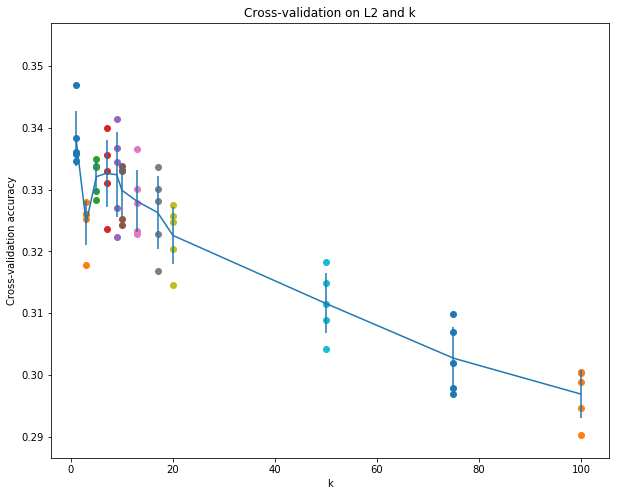

1007.6753840446472
964.3713884353638
931.2666790485382
935.8592772483826
935.336386680603
932.5349447727203
930.3649713993073
930.0942332744598
931.9870181083679
931.1245701313019
929.9463639259338
931.2789318561554
930.7132325172424
937.4885649681091
934.1630141735077
940.0983912944794
935.4199113845825
935.2284941673279
931.919173002243
936.7022714614868
937.4018125534058
930.7443201541901
932.0192885398865
934.6698780059814
930.3991730213165
931.0171720981598
931.9815785884857
935.772768497467
932.5004887580872
934.4363009929657
931.3644368648529
942.6199390888214
933.9870705604553
931.8931219577789
933.9933953285217
937.8920629024506
932.875
932.3613543510437
934.0066511631012
939.0758571624756
936.369188785553
930.2195847034454
931.9815700054169
930.9641759395599
930.5745587348938
934.3305382728577
936.0676407814026
933.7332124710083
937.4430327415466
938.8999869823456
936.4820129871368
932.8392989635468
939.5501980781555
933.0643756389618
937.5520493984222
932.2597408294678
931.5

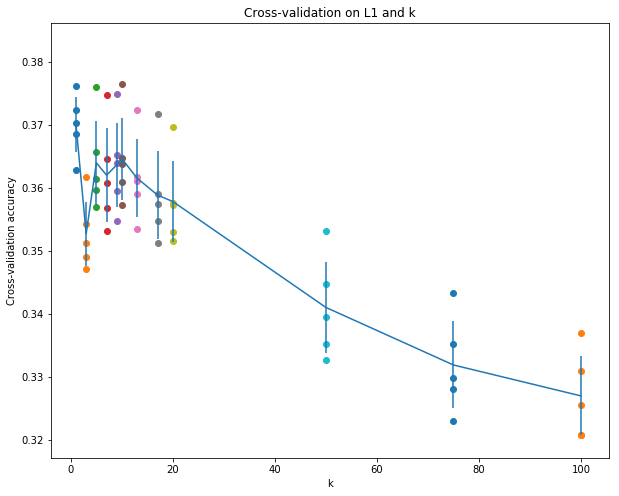

In [6]:
test_cross_validate('L2')
test_cross_validate('L1')